In [1]:
from google.colab import files
uploaded = files.upload()

Saving processed.cleveland.data to processed.cleveland (5).data
Saving processed.hungarian.data to processed.hungarian (5).data
Saving processed.switzerland.data to processed.switzerland (5).data


In [2]:
#importing the required libraries for data pre-processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [3]:
#adding the column names to the dataset.
column_names = [
    "age",
    "gender",
    "chest_pain",
    "resting_BP ",
    "serum_cholestoral",
    "fasting_blood_sugar",
    "resting_ecg",
    "max_heart_rate",
    "exercise_angina",
    "oldpeak",
    "slope",
    "num_major_vessels",
    "thal",
    "target"
]

In [4]:
#reading all the individual countries heart disease dataset to a dataframe.
cleave_data = pd.read_csv(io.BytesIO(uploaded['processed.cleveland (5).data']), delimiter=',', header=None, names= column_names)
display(cleave_data.head())


hung_data = pd.read_csv(io.BytesIO(uploaded['processed.hungarian (5).data']), delimiter=',', header=None, names= column_names)
display(hung_data.head())

swiss_data = pd.read_csv(io.BytesIO(uploaded['processed.switzerland (5).data']), delimiter=',', header=None, names= column_names)
display(swiss_data.head())

,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [5]:
#replacing the '?' value with NULL values
cleave_data.replace('?', np.nan, inplace=True)
hung_data.replace('?', np.nan, inplace=True)
swiss_data.replace('?', np.nan, inplace=True)

In [6]:
#combining the three dataframes.
heart_data = pd.concat([cleave_data,hung_data,swiss_data], ignore_index=True)

#converting all the different datatypes into numeric datatype.
for col in heart_data.columns:
    heart_data[col] = pd.to_numeric(heart_data[col], errors='coerce')

# **EDA of Combined Dataset**

In [7]:
#displaying first 10 rows of the combined dataset.
display(heart_data.head(10))

#displaying last 10 rows of the combined dataset.
display(heart_data.tail(10))

,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
710,67.0,1.0,1.0,145.0,0.0,0.0,2.0,125.0,0.0,0.0,2.0,NaN,3.0,2
711,68.0,1.0,4.0,135.0,0.0,0.0,1.0,120.0,1.0,0.0,1.0,NaN,7.0,3
712,68.0,1.0,4.0,145.0,0.0,NaN,0.0,136.0,0.0,1.8,1.0,NaN,NaN,1
713,69.0,1.0,4.0,135.0,0.0,0.0,0.0,130.0,0.0,0.0,2.0,NaN,6.0,1
714,69.0,1.0,4.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,3
715,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
716,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
717,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
718,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1
719,74.0,1.0,2.0,145.0,0.0,NaN,1.0,123.0,0.0,1.3,1.0,NaN,NaN,1


In [8]:
print("\nthe dimensions of the dataset is:\n")
print(heart_data.shape)

print("\nthe overview of columns present in dataset\n")
print(heart_data.info())

print("\nChecking the distribution of the numerical values in the dataset\n")
print(heart_data.describe())


the dimensions of the dataset is:

(720, 14)

the overview of columns present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  720 non-null    float64
 1   gender               720 non-null    float64
 2   chest_pain           720 non-null    float64
 3   resting_BP           717 non-null    float64
 4   serum_cholestoral    697 non-null    float64
 5   fasting_blood_sugar  637 non-null    float64
 6   resting_ecg          718 non-null    float64
 7   max_heart_rate       718 non-null    float64
 8   exercise_angina      718 non-null    float64
 9   oldpeak              714 non-null    float64
 10  slope                513 non-null    float64
 11  num_major_vessels    307 non-null    float64
 12  thal                 400 non-null    float64
 13  target               720 non-null    int64  
dtyp

In [9]:
#checking for NULL values.
heart_data.isnull().sum()

,0
age,0
gender,0
chest_pain,0
resting_BP,3
serum_cholestoral,23
fasting_blood_sugar,83
resting_ecg,2
max_heart_rate,2
exercise_angina,2
oldpeak,6


# **UNIVARIATE ANALYSIS**

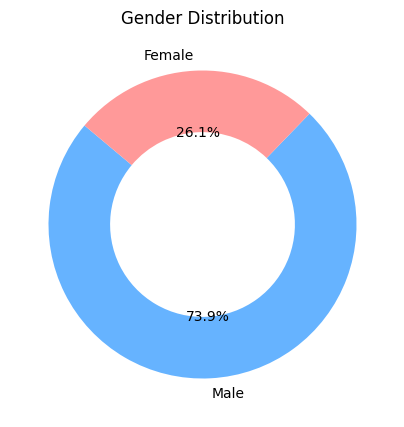

In [10]:
#doughnut plot to show the distribution of the gender in the dataset.
gender_counts = heart_data['gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title('Gender Distribution')
plt.show()

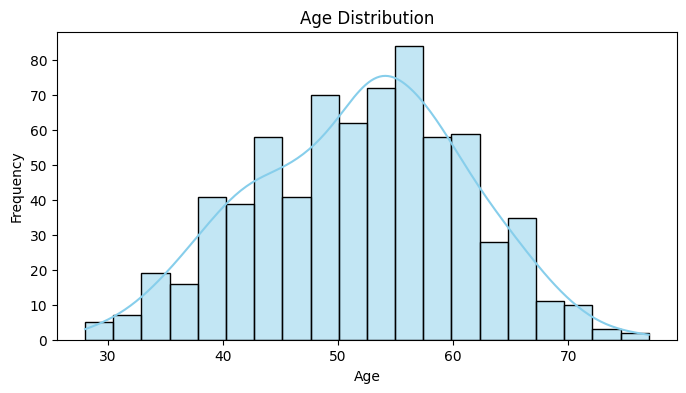

In [11]:
#checking the distribution of age
plt.figure(figsize=(8, 4))
sns.histplot(heart_data['age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-12-3957644468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='chest_pain', data=heart_data, palette='Set2')


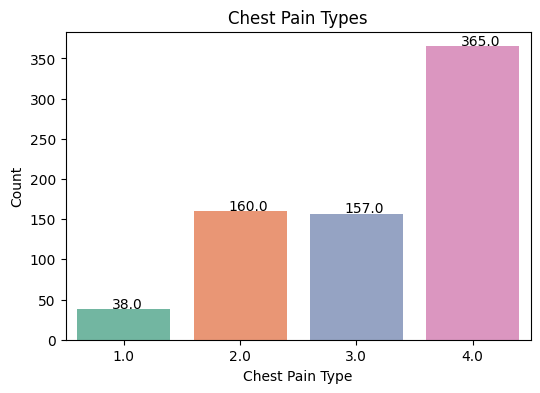

In [12]:
#chest_pain Types
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='chest_pain', data=heart_data, palette='Set2')
plt.title('Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.3, p.get_height()+1))

plt.show()

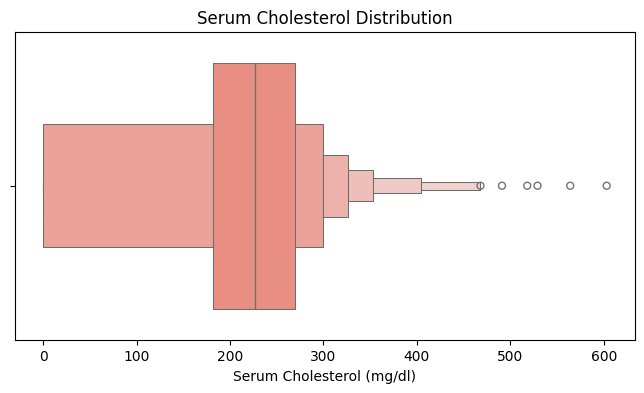

In [13]:
#Serum Cholestrol Distribution
plt.figure(figsize=(8, 4))
sns.boxenplot(x=heart_data['serum_cholestoral'], color='salmon')
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.show()

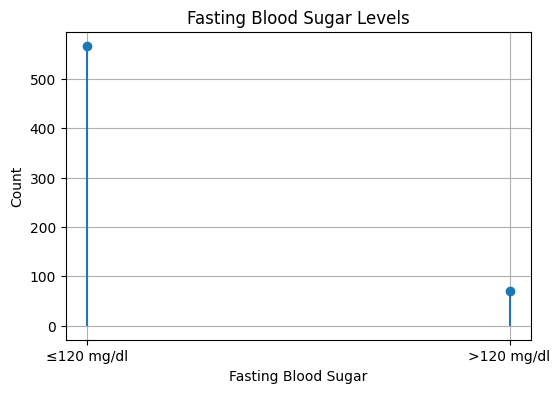

In [14]:
#fasting_bloodsugar
fbs_counts = heart_data['fasting_blood_sugar'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
# Removed the deprecated 'use_line_collection' argument
plt.stem(fbs_counts.index, fbs_counts.values, basefmt=" ")
plt.xticks([0, 1], ['≤120 mg/dl', '>120 mg/dl'])
plt.title('Fasting Blood Sugar Levels')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.grid(True)
plt.show()

/tmp/ipython-input-15-3834710484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='resting_ecg', data=heart_data, jitter=True, palette='cool', size=6)


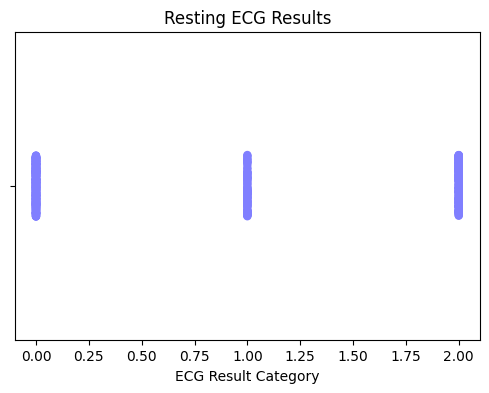

In [15]:
#resting_ecg
plt.figure(figsize=(6, 4))
sns.stripplot(x='resting_ecg', data=heart_data, jitter=True, palette='cool', size=6)
plt.title('Resting ECG Results')
plt.xlabel('ECG Result Category')
plt.show()

/tmp/ipython-input-16-2651360449.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_data['max_heart_rate'], shade=True, color='green')


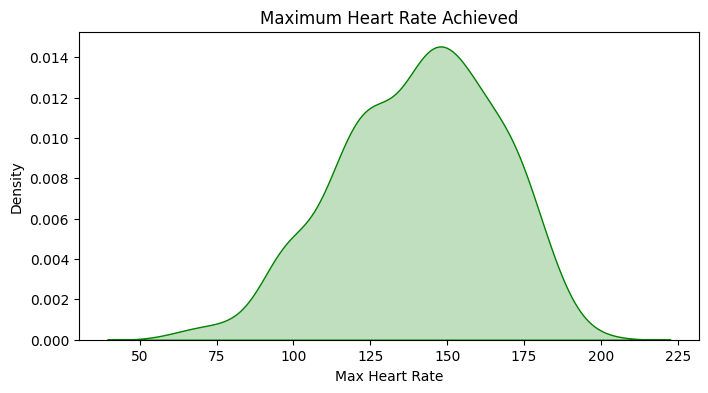

In [16]:
#max_heart_rate
plt.figure(figsize=(8, 4))
sns.kdeplot(heart_data['max_heart_rate'], shade=True, color='green')
plt.title('Maximum Heart Rate Achieved')
plt.xlabel('Max Heart Rate')
plt.show()

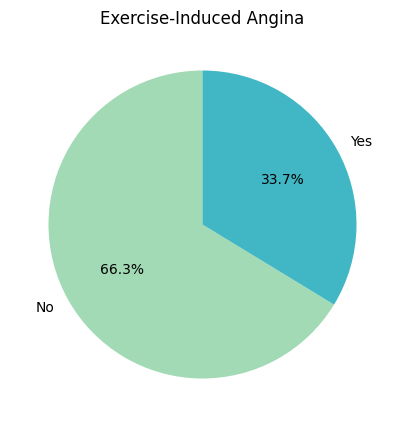

In [17]:
#exercise_induced_angia
labels = ['No', 'Yes']
values = heart_data['exercise_angina'].value_counts().sort_index()
colors = ['#a1dab4', '#41b6c4']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Exercise-Induced Angina')
plt.show()

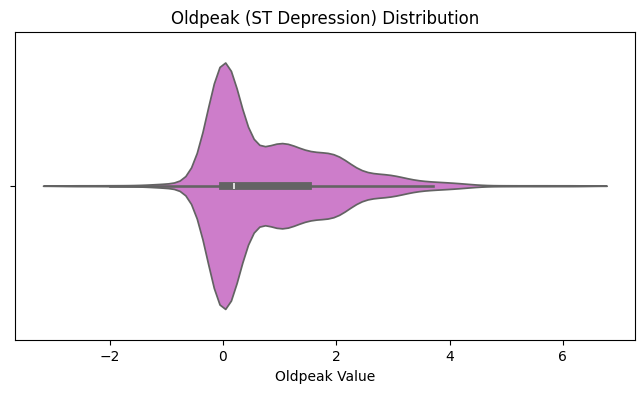

In [18]:
#oldpeak_distribution
plt.figure(figsize=(8, 4))
sns.violinplot(x=heart_data['oldpeak'], color='orchid')
plt.title('Oldpeak (ST Depression) Distribution')
plt.xlabel('Oldpeak Value')
plt.show()

/tmp/ipython-input-19-2066208742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=slope_counts.values, y=labels, palette='Blues_r')


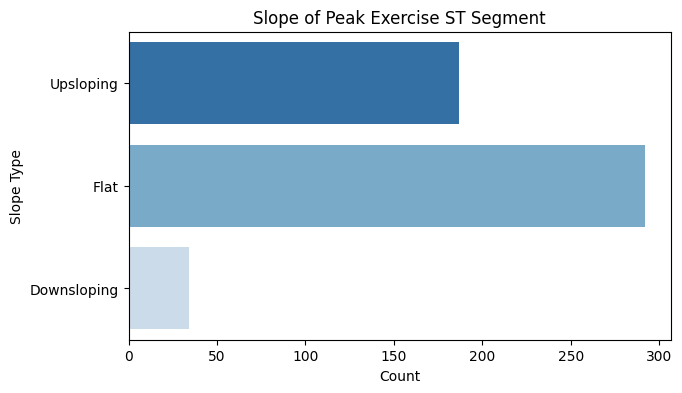

In [19]:
#slope_distribution
slope_counts = heart_data['slope'].value_counts().sort_index()
labels = ['Upsloping', 'Flat', 'Downsloping']

plt.figure(figsize=(7, 4))
sns.barplot(x=slope_counts.values, y=labels, palette='Blues_r')
plt.title('Slope of Peak Exercise ST Segment')
plt.xlabel('Count')
plt.ylabel('Slope Type')
plt.show()

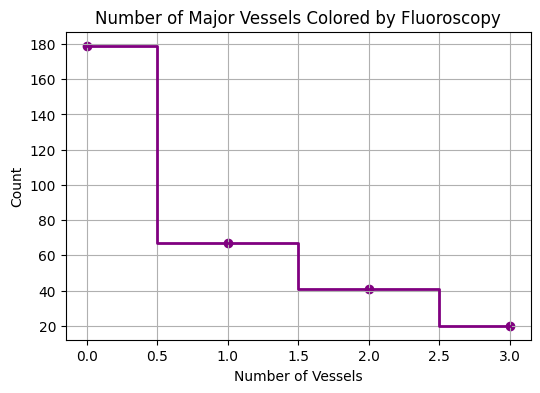

In [20]:
vessel_counts = heart_data['num_major_vessels'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.step(vessel_counts.index, vessel_counts.values, where='mid', linewidth=2, color='purple')
plt.scatter(vessel_counts.index, vessel_counts.values, color='purple')
plt.title('Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Vessels')
plt.ylabel('Count')
plt.grid(True)
plt.show()

/tmp/ipython-input-21-3262565683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='thal', data=heart_data, palette='pastel')


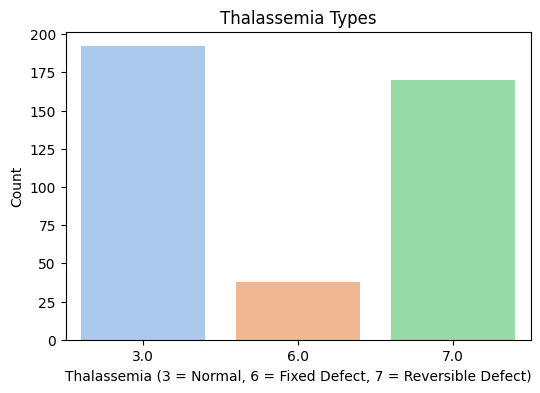

In [21]:
#thalassemia
plt.figure(figsize=(6, 4))
sns.countplot(x='thal', data=heart_data, palette='pastel')
plt.title('Thalassemia Types')
plt.xlabel('Thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)')
plt.ylabel('Count')
plt.show()

# **BI-Variate Analysis**

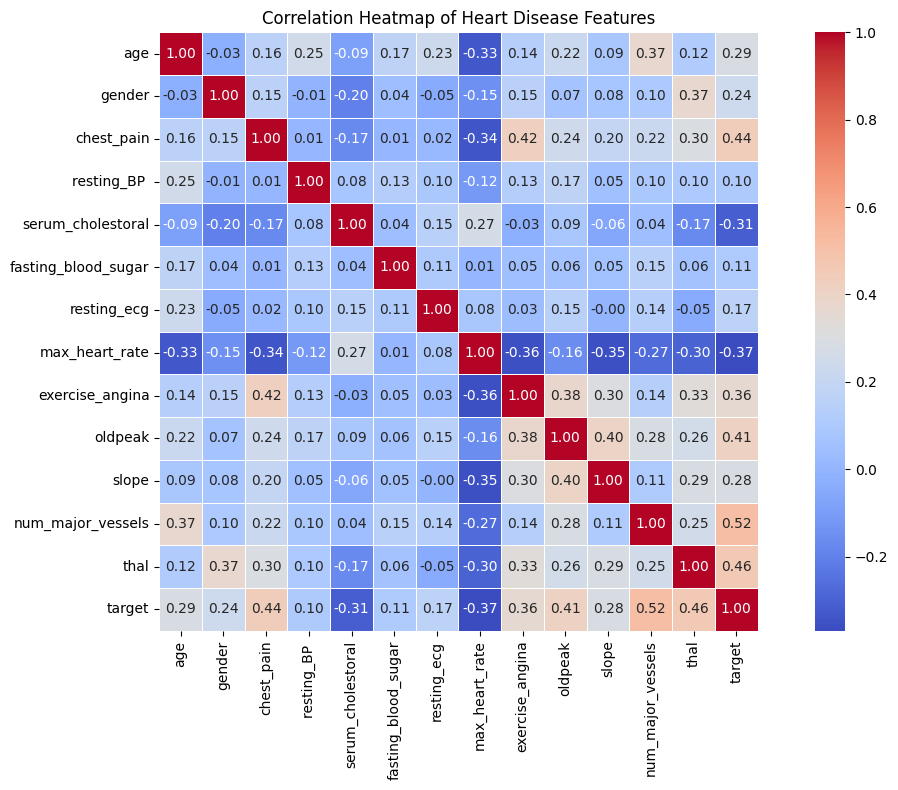

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Heatmap of Heart Disease Features")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

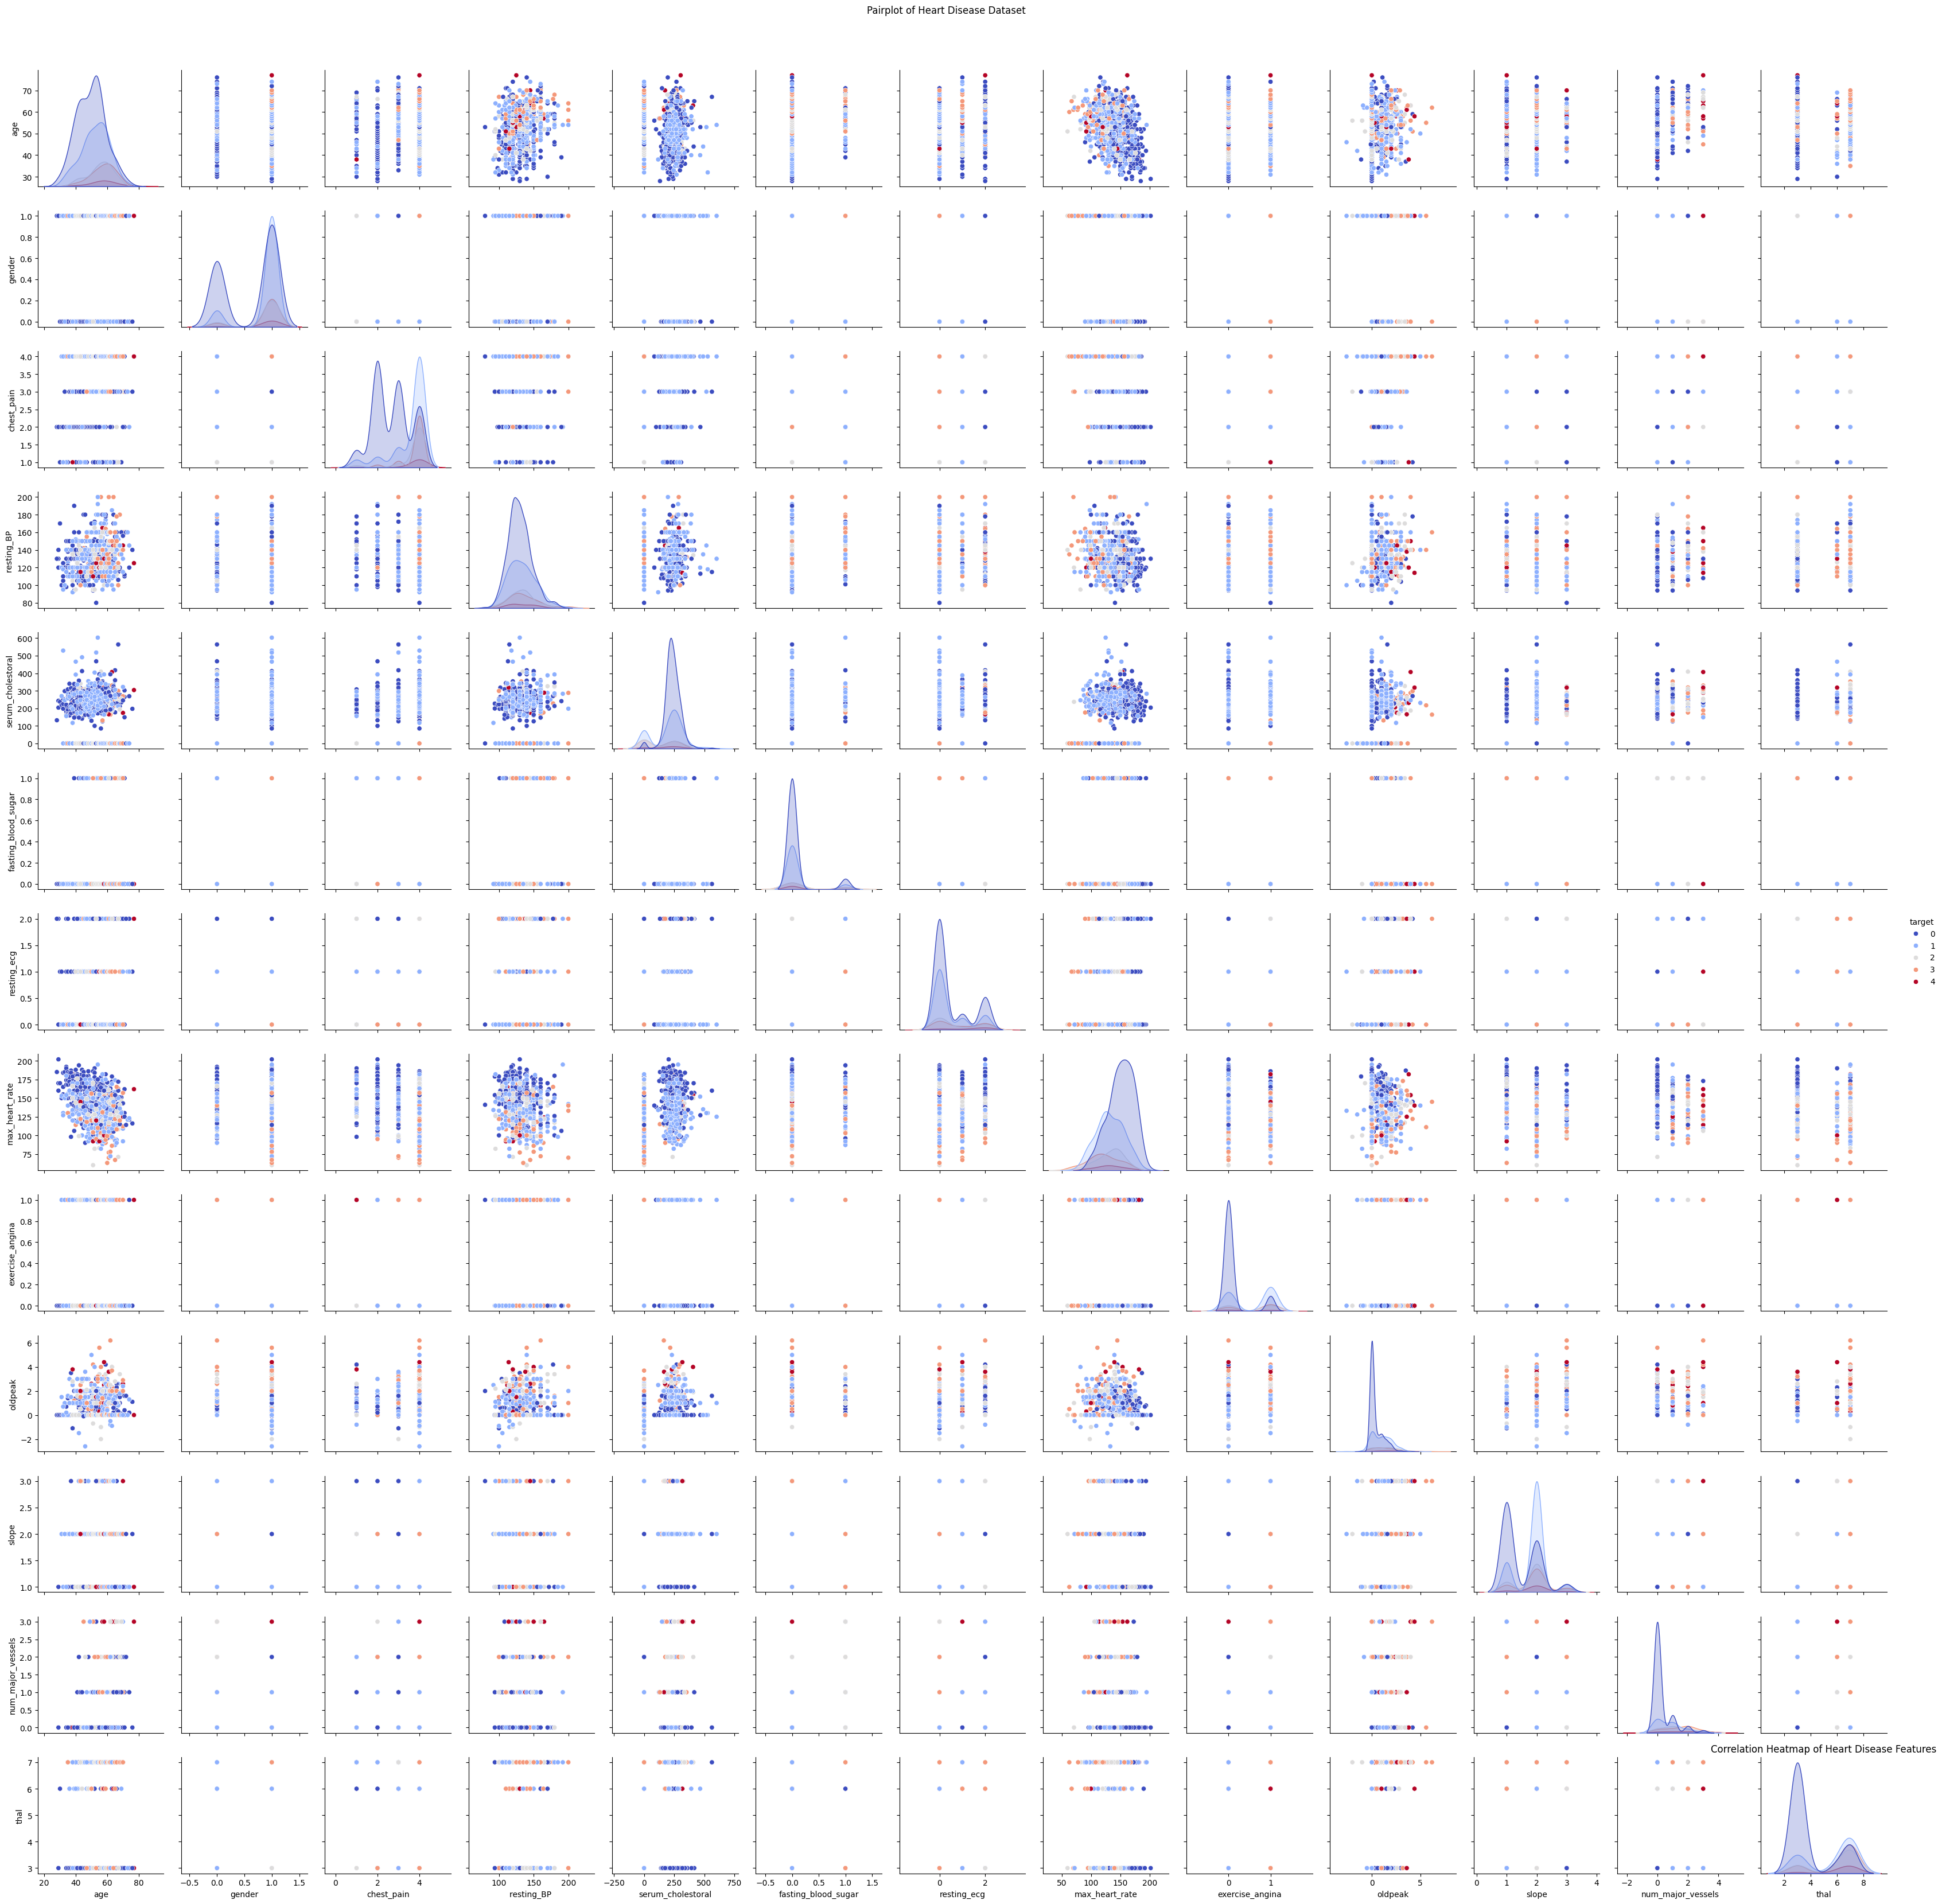

In [23]:
plt.figure(figsize=(12, 8))
sns.pairplot(heart_data, hue='target', palette='coolwarm')
plt.suptitle("Pairplot of Heart Disease Dataset", y=1.02)
plt.title("Correlation Heatmap of Heart Disease Features")
plt.tight_layout()
plt.show()